In [1]:
import numpy as np
import pandas as pd

In [ ]:
#https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-3-zipfs-law-data-visualisation-fc9eadda71e7

In [7]:
import csv
import nltk
import string
from string import digits
WordList = []
RatingList = []

In [8]:
with open('Amazon_Comments.csv', "r") as Amazoncsvfile:
    csvreader = csv.reader(Amazoncsvfile, delimiter = "^")
    remove_digits = str.maketrans('', '', digits)
    translator = str.maketrans('', '', string.punctuation)
    for row in csvreader:
        text = row[-2]
        lowers = text.lower()
        no_punctuation = lowers.translate(translator).translate(remove_digits)
        tokens = nltk.word_tokenize(no_punctuation)
        newtokens = [w for w in tokens if w.isalnum()]
        WordList.extend(newtokens)
fdist = nltk.FreqDist(WordList)

In [9]:
fdist.most_common(10)

[('the', 2396),
 ('i', 1875),
 ('and', 1746),
 ('it', 1703),
 ('a', 1464),
 ('to', 1446),
 ('this', 1041),
 ('for', 925),
 ('my', 841),
 ('is', 818)]

In [59]:
key_list = list(fdist.keys())

In [60]:
value_list = list(fdist.values())

In [61]:
df = pd.DataFrame(list(zip(key_list, value_list)), 
                  columns =['key', 'value'])

In [62]:
sort_df = df.sort_values(by='value', ascending=False)

In [63]:
sort_df

,key,value
4,the,2396
10,i,1875
16,and,1746
28,it,1703
12,a,1464
65,to,1446
92,this,1041
8,for,925
31,my,841
143,is,818


In [64]:
index_list = list(range(1, len(fdist)+1))

In [65]:
sort_df['rank'] = index_list

In [67]:
sort_df

,key,value,rank
4,the,2396,1
10,i,1875,2
16,and,1746,3
28,it,1703,4
12,a,1464,5
65,to,1446,6
92,this,1041,7
8,for,925,8
31,my,841,9
143,is,818,10


In [68]:
sort_df['value_log'] = np.log(sort_df['value']) 

In [69]:
sort_df['rank_log'] = np.log(sort_df['rank']) 

In [70]:
sort_df

,key,value,rank,value_log,rank_log
4,the,2396,1,7.781556,0.000000
10,i,1875,2,7.536364,0.693147
16,and,1746,3,7.465083,1.098612
28,it,1703,4,7.440147,1.386294
12,a,1464,5,7.288928,1.609438
65,to,1446,6,7.276556,1.791759
92,this,1041,7,6.947937,1.945910
8,for,925,8,6.829794,2.079442
31,my,841,9,6.734592,2.197225
143,is,818,10,6.706862,2.302585


In [73]:
%matplotlib inline
from matplotlib import pyplot as plt

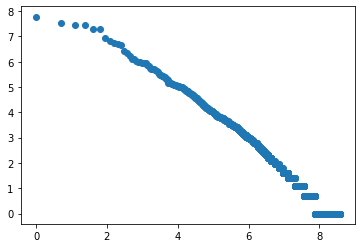

In [74]:
plt.scatter(sort_df.rank_log, sort_df.value_log)